In [1]:
import sys
import os

In [2]:
## adding scripts to path
sys.path.append("../scripts")

In [3]:
from model import GCDDDetector
import config
from datasets import ImageDataset
from utils import get_labelencoder
import pandas as pd
import numpy as np
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms import ToTensor
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

In [4]:
def compare_imgs(img1, img2):
    fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,9))
    ax1.imshow(img1)
    ax2.imshow(img2)
    plt.show()

def draw_boxes(image, target, width=4, color=None):
    font = "/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf"
    boxes = target["boxes"]
    labels = target["labels"]
    return draw_bounding_boxes(image, boxes, [str(label.item()) for label in labels], width=width, font=font, font_size=50, colors=[color] * len(labels))

def compare_single(image, target_gt, target_pred):
    image = draw_boxes(image, target_gt, color="#8934eb") ## target
    image = draw_boxes(image, target_pred, color="#eb4034") ## pred
    return image.permute(1,2,0)

In [5]:
CHECKPOINT_NAME="epoch-epoch=00_lr=0.0004_map@50=map_50=0.22.ckpt"
CHECKPOINT_PATH = os.path.join("../checkpoints/", CHECKPOINT_NAME)
DATA_PATH = "../data"
ANNOT_PATH = os.path.join(DATA_PATH, "Train.csv")
IMGS_DIR = os.path.join(DATA_PATH, "images")

In [6]:
model = GCDDDetector.load_from_checkpoint(CHECKPOINT_PATH,
                                                  num_classes=24,
                                                  learning_rate=config.LEARNING_RATE,
                                                  trainable_backbone_layers=config.TRAINABLE_BACKBONE_LAYERS,
                                                  map_location="cpu"
                                                 )
# model = GCDDDetector(24,
#                              learning_rate=config.LEARNING_RATE,
#                              trainable_backbone_layers=config.TRAINABLE_BACKBONE_LAYERS
#                     )
model.eval();

In [7]:
model.detector.roi_heads.nms_thresh

0.01

In [8]:
label_encoder = get_labelencoder(ANNOT_PATH, "class")
dataset = ImageDataset(pd.read_csv(ANNOT_PATH), IMGS_DIR, label_encoder, transforms=ToTensor())

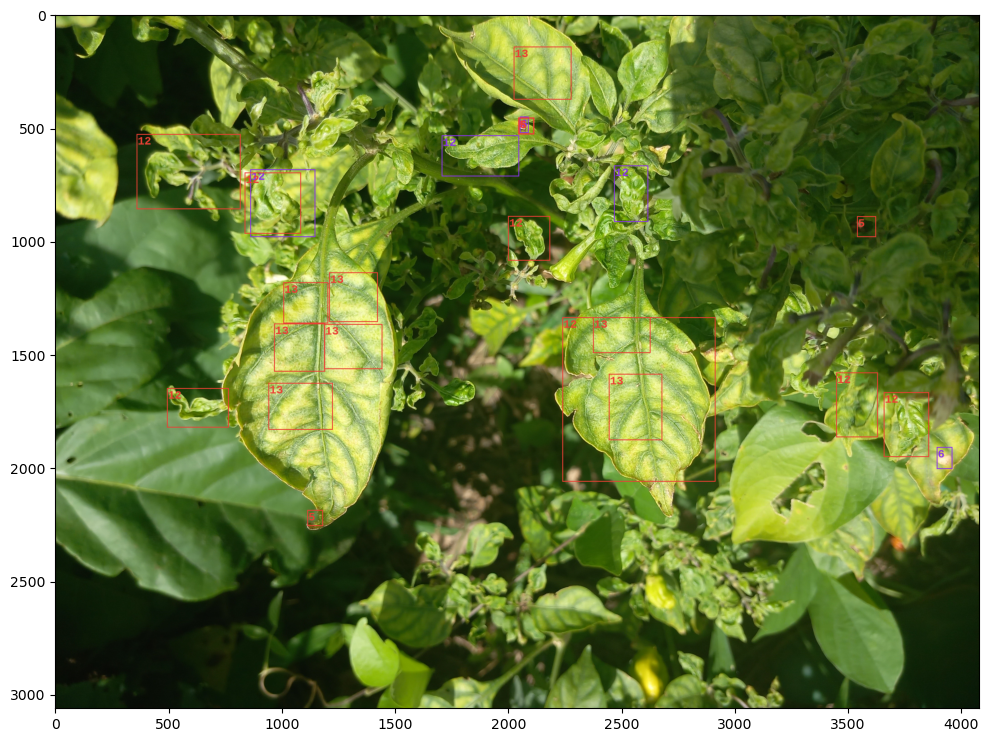

In [9]:
rand_index = np.random.randint(0, len(dataset))
# rand_index = 3990
image, target = dataset[rand_index]

with torch.no_grad(): preds = model([image])[0]
# img_with_gt = draw_boxes(image, target)
# img_with_pred = draw_boxes(image, preds)



# compare_imgs(img_with_gt.permute(1,2, 0).numpy(), img_with_pred.permute(1,2,0).numpy())
# F.to_pil_image(img_with_gt)

fig = plt.figure(figsize=(16,9))
plt.imshow(compare_single(image, target, preds))
plt.show()

In [8]:
from torchvision.models.detection import (
    fasterrcnn_mobilenet_v3_large_fpn,
    FasterRCNN_MobileNet_V3_Large_FPN_Weights,
)
from torchvision.models.detection.rpn import AnchorGenerator

In [16]:
item = fasterrcnn_mobilenet_v3_large_fpn(
    weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1
    rpn_anchor_boxes=AnchorGenerator(sizes=config.ANCHOR_SIZES, aspect_ratios=config.ANCHOR_RATIOS),
                                        )

TypeError: torchvision.models.detection.faster_rcnn.FasterRCNN() got multiple values for keyword argument 'rpn_anchor_generator'